In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('done')

done


In [3]:
#Load the dataset
df=pd.read_csv(r"C:\Users\Aakanksha\Downloads\matches (1).csv")
df.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [4]:
#Easy Level Question
#1.Total Matches Played
total_matches=df.shape[0]
print('Total TPL Matches Played',total_matches)

Total TPL Matches Played 1095


In [5]:
#2.City with Most Matches
most_matches_city=df['city'].value_counts().idxmax()
print('City with most matches',most_matches_city)

City with most matches Mumbai


In [7]:
#3.top 5 venues
df['venue'].value_counts().head()

venue
Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Feroz Shah Kotla                             60
Rajiv Gandhi International Stadium, Uppal    49
Name: count, dtype: int64

In [10]:
#4.Seasons with Highest Matches
df['season'].value_counts().head()

season
2013    76
2022    74
2012    74
2023    74
2011    73
Name: count, dtype: int64

In [11]:
#5.Super Over Matches
super_overs=df[df['super_over']=='Y'].shape[0]
print('Matches with Super Over:',super_overs)

Matches with Super Over: 14


In [13]:
#6.Result types Recorded
result_types=df['result'].value_counts()
print('Different result types:\n',result_types)

Different result types:
 result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64


In [15]:
#7.Most match-winning team
most_wins=df['winner'].value_counts().head(1)
print('Team with most wins:\n',most_wins)

Team with most wins:
 winner
Mumbai Indians    144
Name: count, dtype: int64


In [19]:
#8.Top Player of Matches
top=df['player_of_match'].value_counts().head(1)
print('Most player of the Match award:\n',top)

Most player of the Match award:
 player_of_match
AB de Villiers    25
Name: count, dtype: int64


In [20]:
#9.Chasing vs Defending wins

#Chasing team wins: result=='wickets'
chasing_wins=df[df['result']=='wickets'].shape[0]

#Defending team wins: result=='runs'
defending_wins=df[df['result']=='runs'].shape[0]

print('Matches won by chasing:',chasing_wins)
print('Matches won by defending:',defending_wins)

Matches won by chasing: 578
Matches won by defending: 498


In [22]:
#10.Avg win margin

avg_run_margin=df[df['result']=='runs']['result_margin'].mean()
avg_wicket_margin=df[df['result']=='wickets']['result_margin'].mean()

print('Averge win margin(runs):',avg_run_margin)
print('Averge win margin(wickets):',avg_wicket_margin)

Averge win margin(runs): 30.104417670682732
Averge win margin(wickets): 6.192041522491349


In [26]:
 #Intermediate level Question
#1.Toss vs Match winner

same_winner=df[df['toss_winner']==df['winner']]
toss_win_rate=len(same_winner)/len(df)*100

print(f'Matches where toss winner also won:{toss_win_rate:.2f}%')

Matches where toss winner also won:50.59%


In [31]:
#2.Season-wise highest win%

# Wins per team per season
wins = df.groupby(['season', 'winner']).size().reset_index(name='wins')

# Matches played: count appearances as team1 and team2
matches = pd.concat([
    df[['season', 'team1']].rename(columns={'team1': 'team'}),
    df[['season', 'team2']].rename(columns={'team2': 'team'})
])
matches = matches.groupby(['season', 'team']).size().reset_index(name='total_matches')

# Merge wins and matches
merged = pd.merge(wins, matches, left_on=['season', 'winner'], right_on=['season', 'team'])

# Calculate win %
merged['win_percentage'] = (merged['wins'] / merged['total_matches']) * 100

# Best team per season
top = merged.loc[merged.groupby('season')['win_percentage'].idxmax()]

# Display results
top[['season', 'winner', 'wins', 'total_matches', 'win_percentage']]

,season,winner,wins,total_matches,win_percentage
6,2007/08,Rajasthan Royals,13,16,81.250000
10,2009,Delhi Daredevils,10,15,66.666667
21,2009/10,Mumbai Indians,11,16,68.750000
24,2011,Chennai Super Kings,11,16,68.750000
38,2012,Kolkata Knight Riders,12,17,70.588235
47,2013,Mumbai Indians,13,19,68.421053
54,2014,Kings XI Punjab,12,17,70.588235
64,2015,Mumbai Indians,10,16,62.500000
75,2016,Sunrisers Hyderabad,11,17,64.705882
80,2017,Mumbai Indians,12,17,70.588235


In [50]:
#3.Best team per venue

# Group by venue and winner to count wins
venue_team_wins = df.groupby(['venue', 'winner']).size().reset_index(name='wins')

# Get the top team (most wins) for each venue
best_team_per_venue = venue_team_wins.loc[venue_team_wins.groupby('venue')['wins'].idxmax()]

# Clean up column names
best_team_per_venue.columns = ['Venue', 'Top Team', 'Wins']

# Sort by number of wins (optional)
best_team_per_venue = best_team_per_venue.sort_values(by='Wins', ascending=False).reset_index(drop=True)

pd.set_option('display.max_rows', None)

# Display the result
best_team_per_venue

,Venue,Top Team,Wins
0,Eden Gardens,Kolkata Knight Riders,45
1,Wankhede Stadium,Mumbai Indians,42
2,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,33
3,Sawai Mansingh Stadium,Rajasthan Royals,32
4,M Chinnaswamy Stadium,Royal Challengers Bangalore,29
5,Feroz Shah Kotla,Delhi Daredevils,23
6,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,20
7,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,18
8,"Wankhede Stadium, Mumbai",Mumbai Indians,10
9,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,10


In [51]:
#4.Chasing-friendly venues/cities

chasing_wins = df[df['result'] == 'wickets']
chasing_venues = chasing_wins['venue'].value_counts().head(5)

print(chasing_venues)

venue
Eden Gardens              45
Wankhede Stadium          37
M Chinnaswamy Stadium     36
Sawai Mansingh Stadium    32
Feroz Shah Kotla          31
Name: count, dtype: int64


Most common toss decision is: field


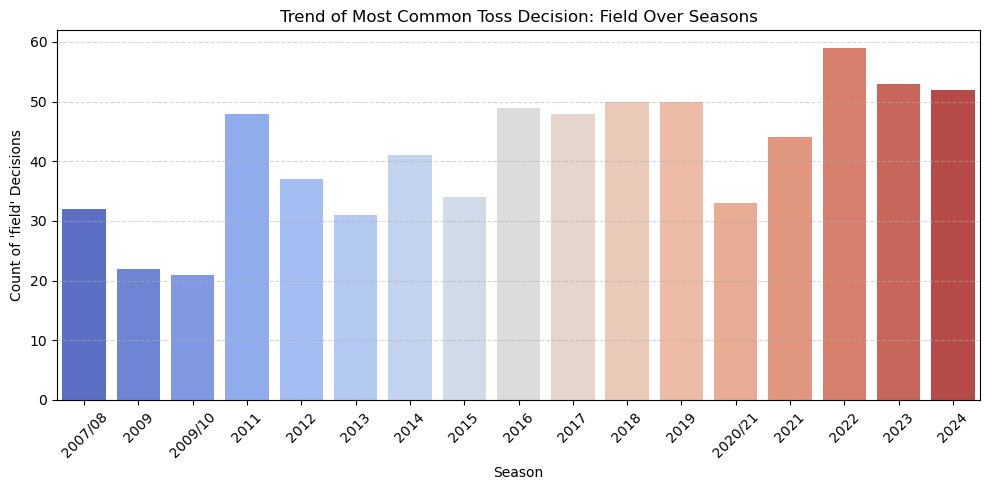

In [19]:
#5.Common toss decision trend


# Find the most common toss decision
common_decision = df['toss_decision'].value_counts().idxmax()
print("Most common toss decision is:", common_decision)

# Filter only those matches where that decision was taken
decision_trend = df[df['toss_decision'] == common_decision]

# Count that decision season-wise
trend = decision_trend['season'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10,5))
sns.barplot(x=trend.index, y=trend.values, palette='coolwarm')
plt.title(f"Trend of Most Common Toss Decision: {common_decision.capitalize()} Over Seasons")
plt.xlabel("Season")
plt.ylabel(f"Count of '{common_decision}' Decisions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [56]:
#6.Top 10 most consistent players

# Get Player of the Match counts
pom_counts = df['player_of_match'].value_counts().reset_index()
pom_counts.columns = ['player', 'pom_awards']

# Show top 10 consistent players based on most PoM awards
top_10_consistent = pom_counts.head(10)
print("Top 10 most consistent players based on Player of the Match awards:\n")
print(top_10_consistent)

Top 10 most consistent players based on Player of the Match awards:

           player  pom_awards
0  AB de Villiers          25
1        CH Gayle          22
2       RG Sharma          19
3         V Kohli          18
4       DA Warner          18
5        MS Dhoni          17
6       YK Pathan          16
7       RA Jadeja          16
8       SR Watson          16
9      AD Russell          15


In [6]:
#7.Highest winning margin by runs or wickets

# Match with highest win by runs
run_win = df[df['result'] == 'runs'].sort_values(by='result_margin', ascending=False).head(1)
print("Highest win by runs:")
print(run_win[['season', 'date', 'team1', 'team2', 'winner', 'result', 'result_margin']])

# Match with highest win by wickets
wicket_win = df[df['result'] == 'wickets'].sort_values(by='result_margin', ascending=False).head(1)
print("\nHighest win by wickets:")
print(wicket_win[['season', 'date', 'team1', 'team2', 'winner', 'result', 'result_margin']])

Highest win by runs:
    season        date             team1           team2          winner  \
620   2017  2017-05-06  Delhi Daredevils  Mumbai Indians  Mumbai Indians   

    result  result_margin  
620   runs          146.0  

Highest win by wickets:
     season        date           team1            team2           winner  \
12  2007/08  2008-04-27  Mumbai Indians  Deccan Chargers  Deccan Chargers   

     result  result_margin  
12  wickets           10.0  


In [10]:
#8.Toss win impact season-wise

# Total matches per season
total_matches = df.groupby('season').size()

#  Matches where toss winner also won the match
toss_match_win = df[df['toss_winner'] == df['winner']]
toss_wins_per_season = toss_match_win.groupby('season').size()

#  Calculate toss win percentage
toss_win_percentage = (toss_wins_per_season / total_matches) * 100

# S Combine into a table
toss_win_stats = pd.DataFrame({
    'Total Matches': total_matches,
    'Toss Winner Wins': toss_wins_per_season,
    'Toss Win %': toss_win_percentage.round(2)
}).fillna(0)

#  Show seasons with high toss win %
high_toss_win_seasons = toss_win_stats[toss_win_stats['Toss Win %'] > 50]
print("Seasons where toss winner had high match win %:\n")
print(high_toss_win_seasons)

Seasons where toss winner had high match win %:

         Total Matches  Toss Winner Wins  Toss Win %
season                                              
2009                57                33       57.89
2009/10             60                31       51.67
2011                73                38       52.05
2016                60                34       56.67
2017                59                34       57.63
2018                60                32       53.33
2019                60                36       60.00
2021                60                35       58.33


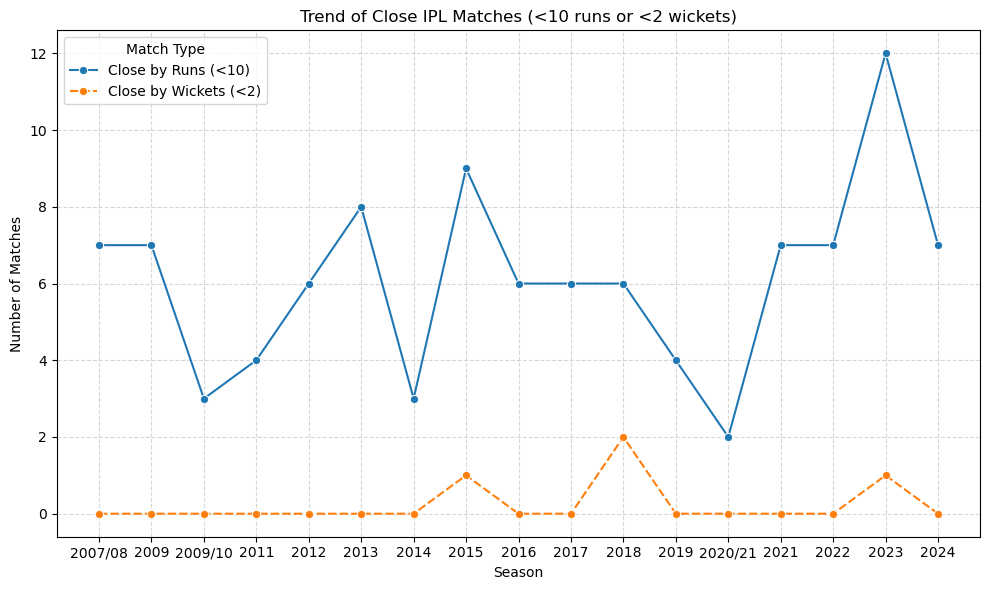

In [5]:
#9.Close match trend

# Step 1: Filter close matches by margin type
close_runs = df[(df['result'] == 'runs') & (df['result_margin'] < 10)]
close_wickets = df[(df['result'] == 'wickets') & (df['result_margin'] < 2)]

# Step 2: Count matches per season
run_trend = close_runs['season'].value_counts().sort_index()
wicket_trend = close_wickets['season'].value_counts().sort_index()

# Step 3: Combine into one DataFrame
close_trend_df = pd.DataFrame({
    'Close by Runs (<10)': run_trend,
    'Close by Wickets (<2)': wicket_trend
}).fillna(0)

# Step 4: Plot both trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=close_trend_df, marker='o')
plt.title("Trend of Close IPL Matches (<10 runs or <2 wickets)")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Match Type")
plt.tight_layout()
plt.show()

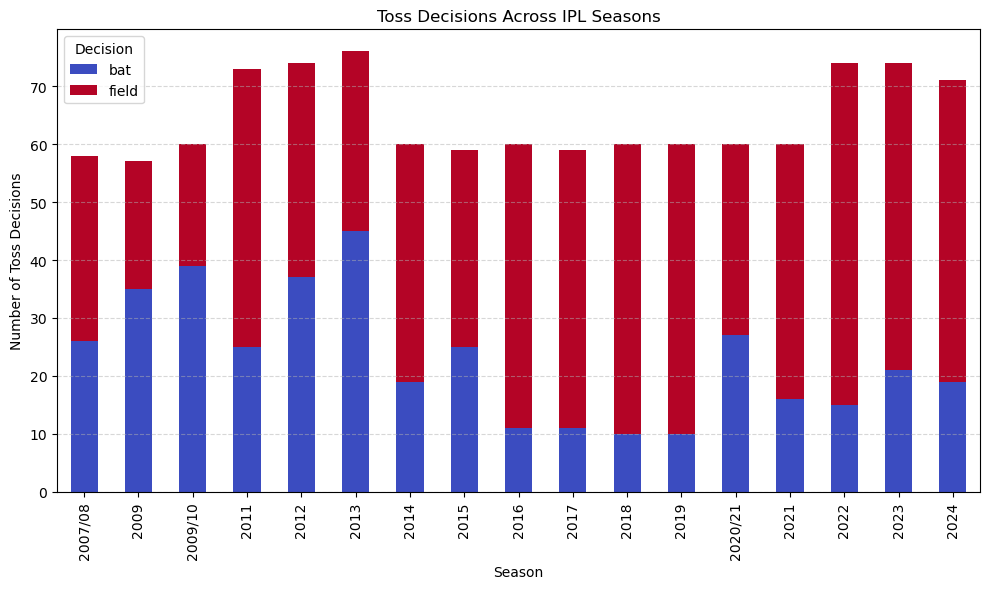

In [15]:
#10.Toss decision pattern across seasons

toss_pattern = df.groupby(['season', 'toss_decision']).size().unstack().fillna(0)


toss_pattern.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

plt.title("Toss Decisions Across IPL Seasons")
plt.xlabel("Season")
plt.ylabel("Number of Toss Decisions")
plt.legend(title="Decision")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

IPL Champions by Season:
     season                 winner
0   2007/08       Rajasthan Royals
1      2009        Deccan Chargers
2   2009/10    Chennai Super Kings
3      2011    Chennai Super Kings
4      2012  Kolkata Knight Riders
5      2013         Mumbai Indians
6      2014  Kolkata Knight Riders
7      2015         Mumbai Indians
8      2016    Sunrisers Hyderabad
9      2017         Mumbai Indians
10     2018    Chennai Super Kings
11     2019         Mumbai Indians
12  2020/21         Mumbai Indians
13     2021    Chennai Super Kings
14     2022         Gujarat Titans
15     2023    Chennai Super Kings
16     2024  Kolkata Knight Riders


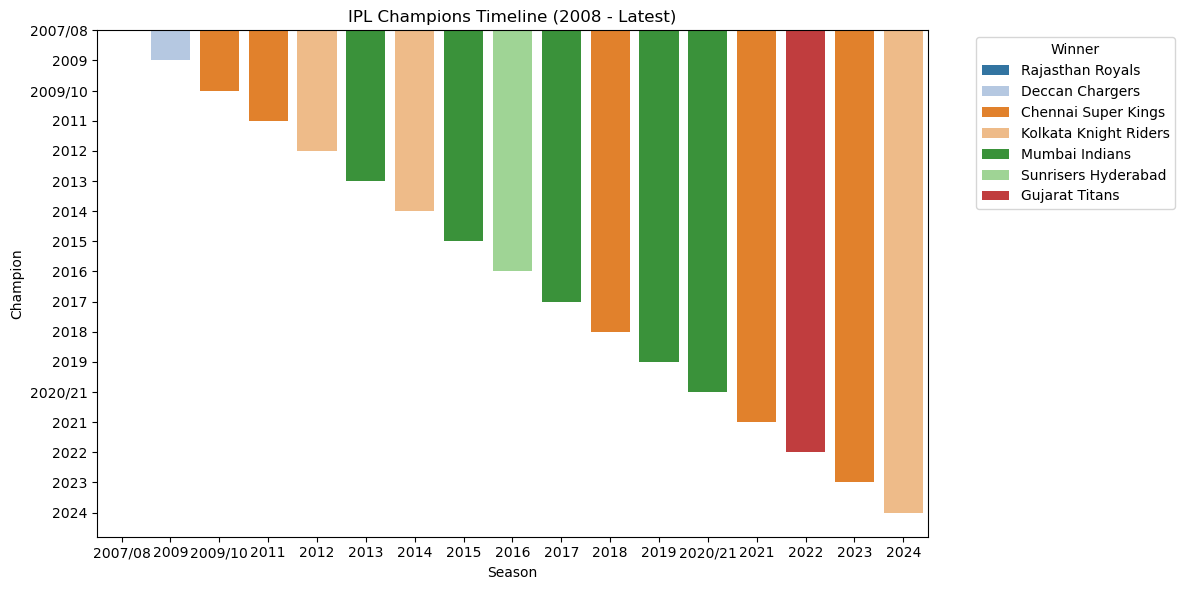

In [3]:
#Advanced level Question

#1.Champion timeline per season

# Step 1: Sort data by date to ensure final match is at the end of each season
final_matches = df.sort_values('date').drop_duplicates(subset='season', keep='last')

# Step 2: Extract season and winner
champions = final_matches[['season', 'winner']].reset_index(drop=True)

# Step 3: Display champions table
print("IPL Champions by Season:")
print(champions)

# Step 4: Visualize
plt.figure(figsize=(12, 6))
sns.barplot(data=champions, x='season', y='season', hue='winner', dodge=False, palette='tab20')
plt.title("IPL Champions Timeline (2008 - Latest)")
plt.xlabel("Season")
plt.ylabel("Champion")
plt.legend(title='Winner', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#The champion timeline tracks IPL winners across seasons, revealing periods of dominance by certain teams and shifts in competitive balance. 
#It highlights dynasties like Mumbai Indians and Chennai Super Kings, while also showing seasons where new champions emerged, reflecting the evolving nature of the league.

     Season  Average Target
0   2007/08       29.375000
1      2009       28.296296
2   2009/10       31.483871
3      2011       33.272727
4      2012       28.235294
5      2013       33.540541
6      2014       29.272727
7      2015       26.562500
8      2016       32.190476
9      2017       30.307692
10     2018       24.107143
11     2019       30.227273
12  2020/21       39.370370
13     2021       26.454545
14     2022       27.945946
15     2023       30.400000
16     2024       30.142857


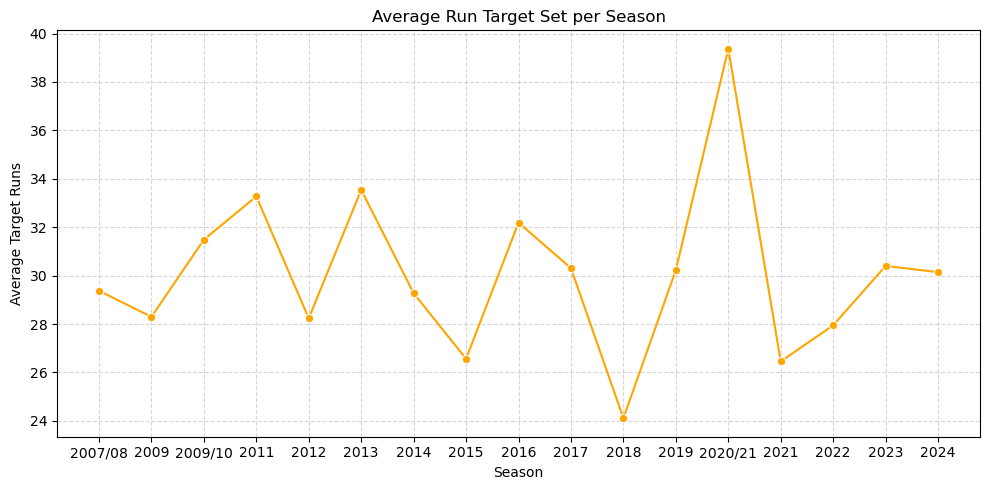

In [5]:
#2. Average run target per season

# Filter only matches where team batted first (i.e., target was set)
bat_first = df[df['result'] == 'runs']

# Group by season and calculate average result_margin (which is the target difference)
avg_target = bat_first.groupby('season')['result_margin'].mean().reset_index()
avg_target.columns = ['Season', 'Average Target']

print(avg_target)

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_target, x='Season', y='Average Target', marker='o', color='orange')
plt.title("Average Run Target Set per Season")
plt.xlabel("Season")
plt.ylabel("Average Target Runs")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#The analysis of average targets set across IPL seasons shows how scoring trends have evolved over time.
#An upward trend reflects the impact of aggressive batting strategies, power-hitting, and evolving pitch conditions, indicating that teams are consistently aiming for higher totals in recent years.

     Season  Average Overs to Chase
0   2007/08               19.941176
1      2009               19.517241
2   2009/10               20.000000
3      2011               19.743590
4      2012               19.800000
5      2013               20.000000
6      2014               19.594595
7      2015               19.000000
8      2016               19.717949
9      2017               19.562500
10     2018               19.781250
11     2019               20.000000
12  2020/21               20.000000
13     2021               20.000000
14     2022               20.000000
15     2023               19.848485
16     2024               20.000000


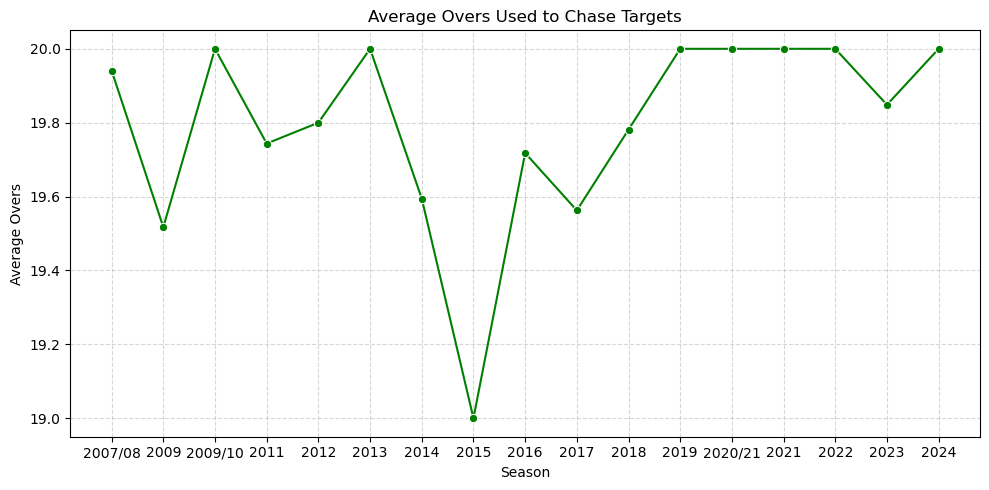


If the average overs are decreasing, it means teams are becoming more aggressive,
If it's constant or increasing, teams are pacing their chase similarly


In [10]:
#3.Average overs to chase

# Step 1: Filter only successfully chased matches 
chased = df[df['result'] == 'wickets'].copy()

# Step 2: Group by season and calculate average target_over
avg_chase_overs = chased.groupby('season')['target_overs'].mean().reset_index()
avg_chase_overs.columns = ['Season', 'Average Overs to Chase']

# Step 3: Show the table
print(avg_chase_overs)

# Step 4: Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_chase_overs, x='Season', y='Average Overs to Chase', marker='o', color='green')
plt.title("Average Overs Used to Chase Targets")
plt.xlabel("Season")
plt.ylabel("Average Overs")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


print("\nIf the average overs are decreasing, it means teams are becoming more aggressive,\nIf it's constant or increasing, teams are pacing their chase similarly")

In [ ]:
#Studying the average overs taken to successfully chase targets reveals changing batting approaches in the IPL.
#A downward trend indicates that teams are becoming more aggressive, often finishing chases well before the allotted overs, driven by improved run rates and fearless batting styles.

In [12]:
#4.Team rivalries:frequency+closeness

# Step 1: Create a consistent team pair key
df['team_pair'] = df.apply(lambda x: '-'.join(sorted([x['team1'], x['team2']])), axis=1)

# Step 2: Group by pair and winner
rivalry = df.groupby(['team_pair', 'winner']).size().reset_index(name='wins')

# Step 3: Total matches per pair
total_matches = df.groupby('team_pair').size().reset_index(name='total_matches')

# Step 4: Pivot to get wins per team
rivalry_pivot = rivalry.pivot(index='team_pair', columns='winner', values='wins').fillna(0)

# Step 5: Add total matches
rivalry_pivot['total_matches'] = total_matches.set_index('team_pair')['total_matches']

# Step 6: Calculate closeness
def win_gap(row):
    wins = row[:-1].values
    if len(wins) < 2:
        return 100  
    return abs((wins[0] / sum(wins)) - 0.5) * 100  # % away from perfect 50%

rivalry_pivot['closeness_score'] = rivalry_pivot.apply(win_gap, axis=1)

# Step 7: Sort by highest frequency & closest matchups
rivalries_ranked = rivalry_pivot.sort_values(by=['closeness_score', 'total_matches'])

# Step 8: Show top 10 rivalries
rivalries_ranked[['total_matches', 'closeness_score']].head(10)

winner,total_matches,closeness_score
team_pair,,
Chennai Super Kings-Kochi Tuskers Kerala,2,0.000000
Chennai Super Kings-Royal Challengers Bengaluru,2,0.000000
Chennai Super Kings-Mumbai Indians,37,4.054054
Chennai Super Kings-Rajasthan Royals,29,5.172414
Chennai Super Kings-Gujarat Titans,7,7.142857
Chennai Super Kings-Delhi Capitals,12,8.333333
Chennai Super Kings-Deccan Chargers,10,10.000000
Chennai Super Kings-Kings XI Punjab,23,10.869565
Chennai Super Kings-Kolkata Knight Riders,29,15.517241


In [ ]:
#The rivalry analysis ranks team matchups based on both frequency and closeness of results.
#Rivalries with near 50-50 win records, such as MI vs CSK, showcase intense competition, while one-sided rivalries reveal periods of dominance by certain teams, shaping the league’s most memorable contests.

Top PoM winners by venue:
                                                venue   player_of_match  \
0                                Arun Jaitley Stadium          A Mishra   
12                        Arun Jaitley Stadium, Delhi          I Sharma   
25                                   Barabati Stadium         A Symonds   
31                Barsapara Cricket Stadium, Guwahati          NT Ellis   
40  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...        MP Stoinis   
46                                  Brabourne Stadium         AM Rahane   
60                          Brabourne Stadium, Mumbai     Kuldeep Yadav   
71                                       Buffalo Park           A Nehra   
74                              De Beers Diamond Oval  DPMD Jayawardene   
82                         Dr DY Patil Sports Academy      DE Bollinger   

    PoM_count  
0           2  
12          2  
25          2  
31          1  
40          2  
46          1  
60          3  
71          1  
74  

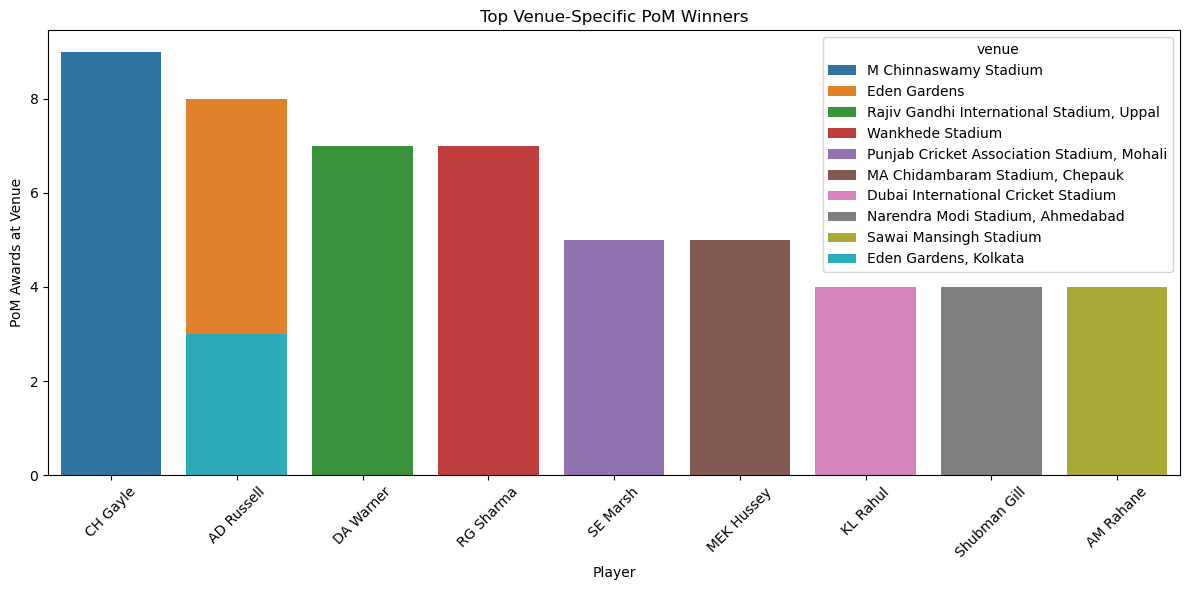

In [14]:
#5.PoM bias by venue

# Step 1: Group by venue and player_of_match to count PoM awards
pom_counts = df.groupby(['venue', 'player_of_match']).size().reset_index(name='PoM_count')

# Step 2: For each venue, find the player with the most PoM awards
top_pom_per_venue = pom_counts.sort_values(['venue', 'PoM_count'], ascending=[True, False]).drop_duplicates(subset='venue', keep='first')

# Step 3: Show top 10
print("Top PoM winners by venue:")
print(top_pom_per_venue.head(10))

# Step 4: Plot top 10 venue-specific performers
plt.figure(figsize=(12, 6))
sns.barplot(data=top_pom_per_venue.sort_values('PoM_count', ascending=False).head(10),
            x='player_of_match', y='PoM_count', hue='venue', dodge=False)
plt.title("Top Venue-Specific PoM Winners")
plt.xlabel("Player")
plt.ylabel("PoM Awards at Venue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Venue-wise Player of the Match analysis uncovers players who excel in specific stadiums, often due to familiarity with pitch conditions, crowd support, or personal playing style. These “venue specialists” consistently deliver standout performances when playing at their favored grounds.

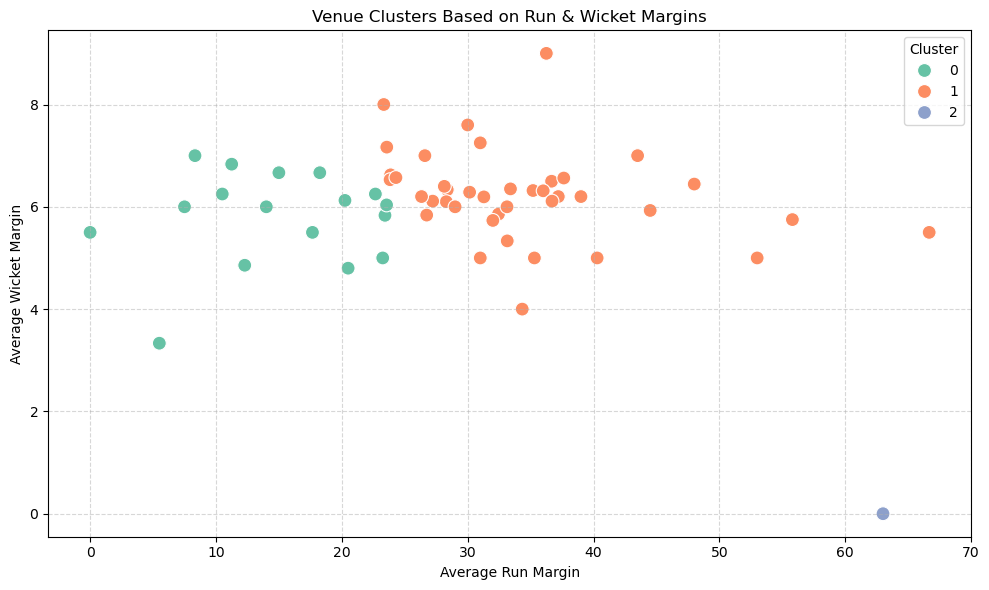

In [6]:
#7.Cluster venues by margin 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Drop missing venue or result data
df = df.dropna(subset=['venue', 'result', 'result_margin'])

# Separate run and wicket wins
run_wins = df[df['result'] == 'runs'].groupby('venue')['result_margin'].mean().reset_index(name='avg_run_margin')
wicket_wins = df[df['result'] == 'wickets'].groupby('venue')['result_margin'].mean().reset_index(name='avg_wicket_margin')

# Merge both types of margins
venue_margin = pd.merge(run_wins, wicket_wins, on='venue', how='outer').fillna(0)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(venue_margin[['avg_run_margin', 'avg_wicket_margin']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
venue_margin['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=venue_margin,
    x='avg_run_margin',
    y='avg_wicket_margin',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title("Venue Clusters Based on Run & Wicket Margins")
plt.xlabel("Average Run Margin")
plt.ylabel("Average Wicket Margin")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#Clustering venues based on average run and wicket margins groups stadiums with similar match outcomes, revealing patterns in how games are decided across locations.
#This helps identify high-scoring venues where wins often come by large run margins versus balanced grounds where close finishes are common.

     Season  Toss_Win_And_Match_Win  Total_Matches  Win_Percent
0   2007/08                      28             58    48.275862
1      2009                      33             56    58.928571
2   2009/10                      31             59    52.542373
3      2011                      38             72    52.777778
4      2012                      33             74    44.594595
5      2013                      35             74    47.297297
6      2014                      29             59    49.152542
7      2015                      27             56    48.214286
8      2016                      34             60    56.666667
9      2017                      34             58    58.620690
10     2018                      32             60    53.333333
11     2019                      34             57    59.649123
12  2020/21                      25             56    44.642857
13     2021                      34             59    57.627119
14     2022                      36     

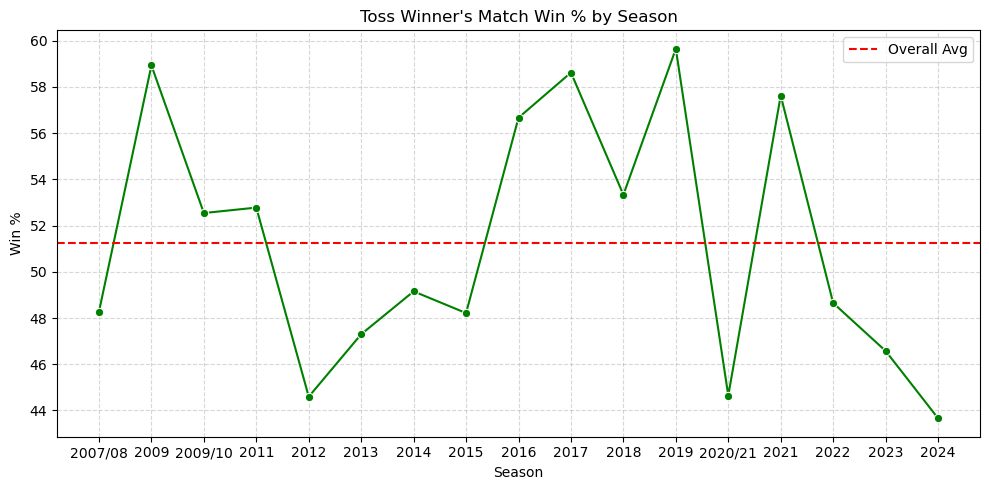

In [9]:
#8.Toss win % anomaly

df['toss_win_match_win'] = df['toss_winner'] == df['winner']

# Group by season and calculate percentage
seasonwise = df.groupby('season')['toss_win_match_win'].agg(['sum', 'count']).reset_index()
seasonwise['win_percent'] = (seasonwise['sum'] / seasonwise['count']) * 100

# Rename for clarity
seasonwise.columns = ['Season', 'Toss_Win_And_Match_Win', 'Total_Matches', 'Win_Percent']

# Display table
print(seasonwise)

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=seasonwise, x='Season', y='Win_Percent', marker='o', color='green')
plt.axhline(seasonwise['Win_Percent'].mean(), color='red', linestyle='--', label='Overall Avg')
plt.title("Toss Winner's Match Win % by Season")
plt.ylabel("Win %")
plt.xlabel("Season")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
#The season-wise toss impact analysis reveals years where winning the toss significantly increased the chances of winning the match. The red line marks the overall average win percentage for toss winners, making it easy to spot seasons—like 2019—where this advantage was unusually high, possibly due to pitch conditions or match timings.

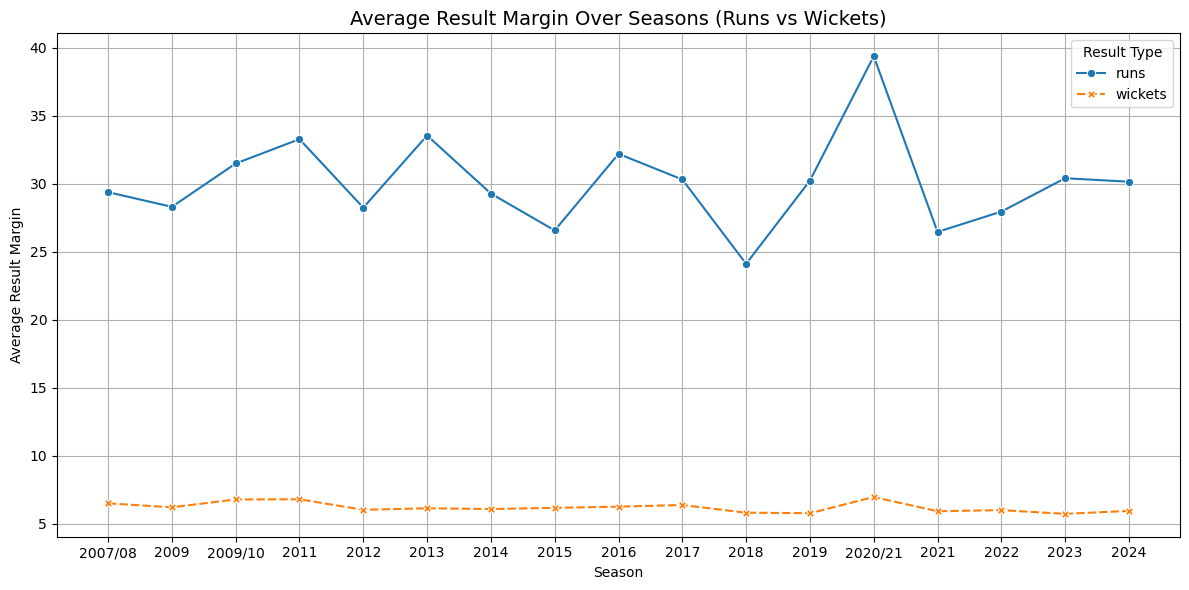

In [23]:
#9.Year wise analysis of average result margin

# Grouping by season and result type
avg_margin_by_year = df[df['result'].isin(['runs', 'wickets'])] \
    .groupby(['season', 'result'])['result_margin'] \
    .mean().reset_index()

# Pivoting for easier plotting
avg_margin_pivot = avg_margin_by_year.pivot(index='season', columns='result', values='result_margin')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_margin_pivot, markers=True)

plt.title('Average Result Margin Over Seasons (Runs vs Wickets)', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Average Result Margin')
plt.legend(title='Result Type')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Over the years, we observe that the average winning margins by runs have decreased slightly, suggesting tighter matches when defending.
#Meanwhile, the margin in wicket victories remains relatively stable, indicating that teams chasing tend to finish games more confidently. 
#These trends point toward an overall increase in competitiveness, especially in defending scenarios.

Most Unpredictable Seasons (Top 5):
   season  narrow_wins  upsets  unpredictability_score
14   2022            7      45                      52
15   2023           15      32                      47
16   2024            9      34                      43
1    2009            8      30                      38
10   2018           10      24                      34


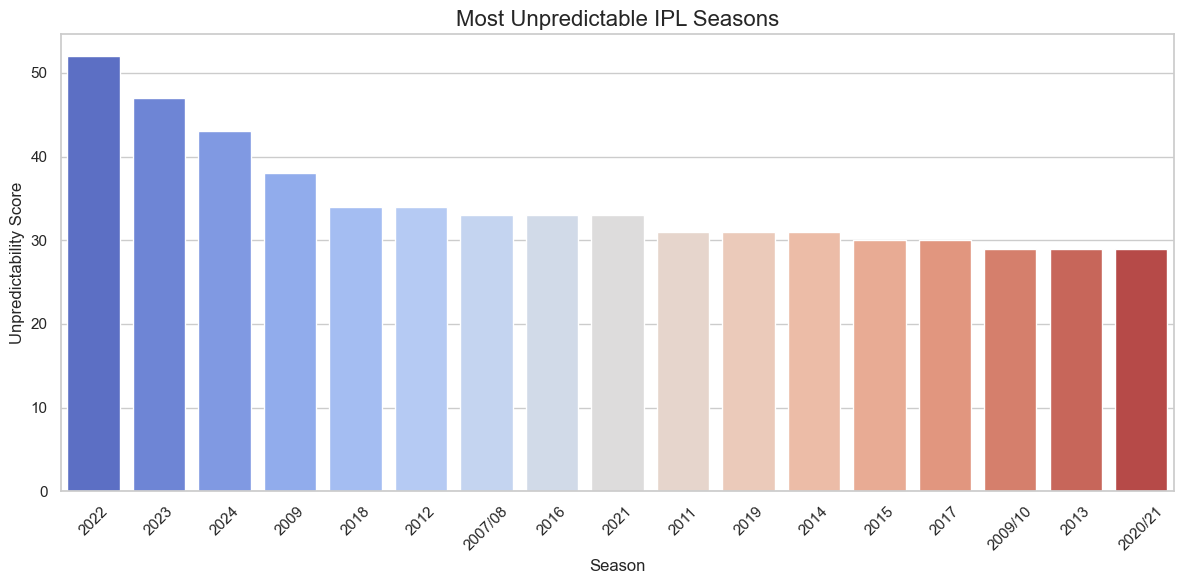

In [37]:
#10.Most unpredictable season

#  Filter only valid results
df = df[df['winner'].notna() & df['result_margin'].notnull()]

# Narrow Wins (≤10 runs or ≤2 wickets)
# First, mark if result was by runs or wickets
df['result_type'] = df['result'].apply(
    lambda x: 'runs' if 'run' in str(x).lower() else 'wickets' if 'wicket' in str(x).lower() else None
)

# Now mark narrow wins
df['is_narrow'] = df.apply(
    lambda x: (x['result_type'] == 'runs' and x['result_margin'] <= 10) or
              (x['result_type'] == 'wickets' and x['result_margin'] <= 2),
    axis=1
)

# Count narrow wins per season
narrow_wins = df[df['is_narrow']].groupby('season').size().reset_index(name='narrow_wins')

#  Upsets
# Count total wins by each team
total_wins = df['winner'].value_counts().to_dict()

# Map total wins for team1 and team2
df['team1_wins'] = df['team1'].map(total_wins).fillna(0)
df['team2_wins'] = df['team2'].map(total_wins).fillna(0)

# Define upsets: team with fewer wins beats stronger team
def is_upset(row):
    if row['team1_wins'] > row['team2_wins']:
        return row['winner'] == row['team2']
    elif row['team2_wins'] > row['team1_wins']:
        return row['winner'] == row['team1']
    else:
        return False

df['is_upset'] = df.apply(is_upset, axis=1)

# Count upsets per season
upsets = df[df['is_upset']].groupby('season').size().reset_index(name='upsets')

#  Merge both
final_df = pd.merge(narrow_wins, upsets, on='season', how='outer').fillna(0)

# Calculate unpredictability score
final_df['unpredictability_score'] = final_df['narrow_wins'] + final_df['upsets']

# Sort to find the most unpredictable season
final_df = final_df.sort_values(by='unpredictability_score', ascending=False)

#  Final output
print("Most Unpredictable Seasons (Top 5):")
print(final_df.head())


# Set style
sns.set(style="whitegrid")

# Plot the unpredictability score
plt.figure(figsize=(12, 6))
sns.barplot(data=final_df, x='season', y='unpredictability_score', palette='coolwarm')

plt.title("Most Unpredictable IPL Seasons", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Unpredictability Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Based on the analysis of narrow wins (by ≤10 runs or ≤2 wickets) and major upsets (where historically weaker teams beat stronger ones),
#the IPL seasons of 2022 and 2023 emerged as the most unpredictable. These seasons saw a high number of close finishes and unexpected match outcomes,
#indicating greater competition and lesser predictability compared to other seasons.

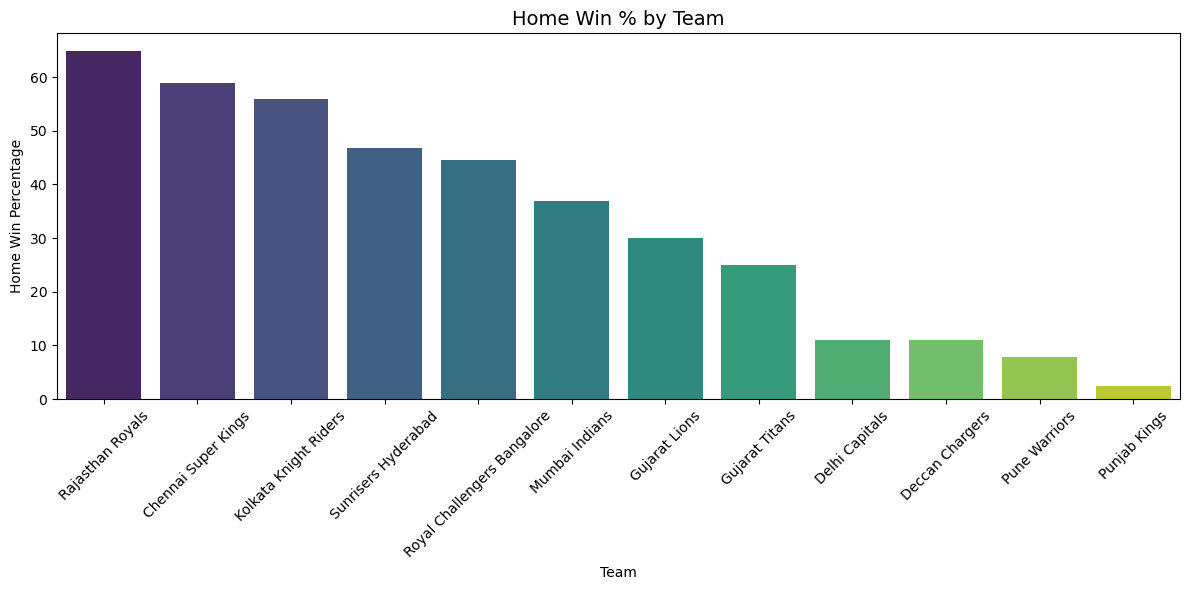

,home_team,total_home_matches,home_wins,home_win_pct
9,Rajasthan Royals,57,37,64.912281
0,Chennai Super Kings,85,50,58.823529
5,Kolkata Knight Riders,93,52,55.913978
11,Sunrisers Hyderabad,77,36,46.753247
10,Royal Challengers Bangalore,65,29,44.615385
6,Mumbai Indians,173,64,36.994220
3,Gujarat Lions,10,3,30.000000
4,Gujarat Titans,36,9,25.000000
2,Delhi Capitals,90,10,11.111111
1,Deccan Chargers,18,2,11.111111


In [4]:
#Expert level questions

#1.Home city advantages

# Step 1: Clean data
df['city'] = df['city'].astype(str).str.strip()
df['winner'] = df['winner'].astype(str).str.strip()

# Step 2: Home city mapping (adjust for your dataset)
city_team_map = {
    'Mumbai': 'Mumbai Indians',
    'Kolkata': 'Kolkata Knight Riders',
    'Chennai': 'Chennai Super Kings',
    'Hyderabad': 'Sunrisers Hyderabad',
    'Delhi': 'Delhi Capitals',
    'Bangalore': 'Royal Challengers Bangalore',
    'Jaipur': 'Rajasthan Royals',
    'Mohali': 'Punjab Kings',
    'Chandigarh': 'Punjab Kings',
    'Dharamsala': 'Punjab Kings',
    'Pune': 'Pune Warriors',
    'Rajkot': 'Gujarat Lions',
    'Ahmedabad': 'Gujarat Titans',
    'Visakhapatnam': 'Deccan Chargers',
    'Nagpur': 'Deccan Chargers'
}

# Step 3: Add home_team column based on city
df['home_team'] = df['city'].map(city_team_map)

# Step 4: Flag matches where winner is home_team
df['home_win'] = df['winner'] == df['home_team']

# Step 5: Calculate home vs away win %
team_stats = df.groupby('home_team').agg(
    total_home_matches=('home_win', 'count'),
    home_wins=('home_win', 'sum')
).reset_index()

team_stats['home_win_pct'] = (team_stats['home_wins'] / team_stats['total_home_matches']) * 100

# Step 6: Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=team_stats.sort_values('home_win_pct', ascending=False),
            x='home_team', y='home_win_pct', palette='viridis')
plt.title('Home Win % by Team', fontsize=14)
plt.ylabel('Home Win Percentage')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Display table
display(team_stats.sort_values('home_win_pct', ascending=False))


In [ ]:
#The analysis shows whether teams have a strong home advantage. 
#For instance, Chennai Super Kings and Rajasthan Royals often display higher home win percentages, leveraging local pitch conditions and fan support.
#Teams with lower home win percentages may struggle despite the home crowd, possibly due to pitch nature or balanced opposition strategies.

,season,team1,team2,target_runs,winner,result,result_margin,city,anomaly_type
0,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,223.0,Kolkata Knight Riders,runs,140.0,Bangalore,Lost after >190 target
1,2007/08,Kings XI Punjab,Chennai Super Kings,241.0,Chennai Super Kings,runs,33.0,Chandigarh,Lost after >190 target
2,2007/08,Deccan Chargers,Rajasthan Royals,215.0,Rajasthan Royals,wickets,3.0,Hyderabad,Lost after >190 target
3,2007/08,Deccan Chargers,Kolkata Knight Riders,205.0,Kolkata Knight Riders,runs,23.0,Hyderabad,Lost after >190 target
4,2007/08,Chennai Super Kings,Rajasthan Royals,212.0,Rajasthan Royals,runs,10.0,Chennai,Lost after >190 target
...,...,...,...,...,...,...,...,...,...
112,2017,Rising Pune Supergiant,Kings XI Punjab,74.0,Rising Pune Supergiant,wickets,9.0,Pune,Failed chasing <120
113,2017,Mumbai Indians,Kolkata Knight Riders,108.0,Mumbai Indians,wickets,6.0,Bangalore,Failed chasing <120
114,2018,Rajasthan Royals,Delhi Daredevils,71.0,Rajasthan Royals,runs,10.0,Jaipur,Failed chasing <120
115,2018,Sunrisers Hyderabad,Mumbai Indians,119.0,Sunrisers Hyderabad,runs,31.0,Mumbai,Failed chasing <120


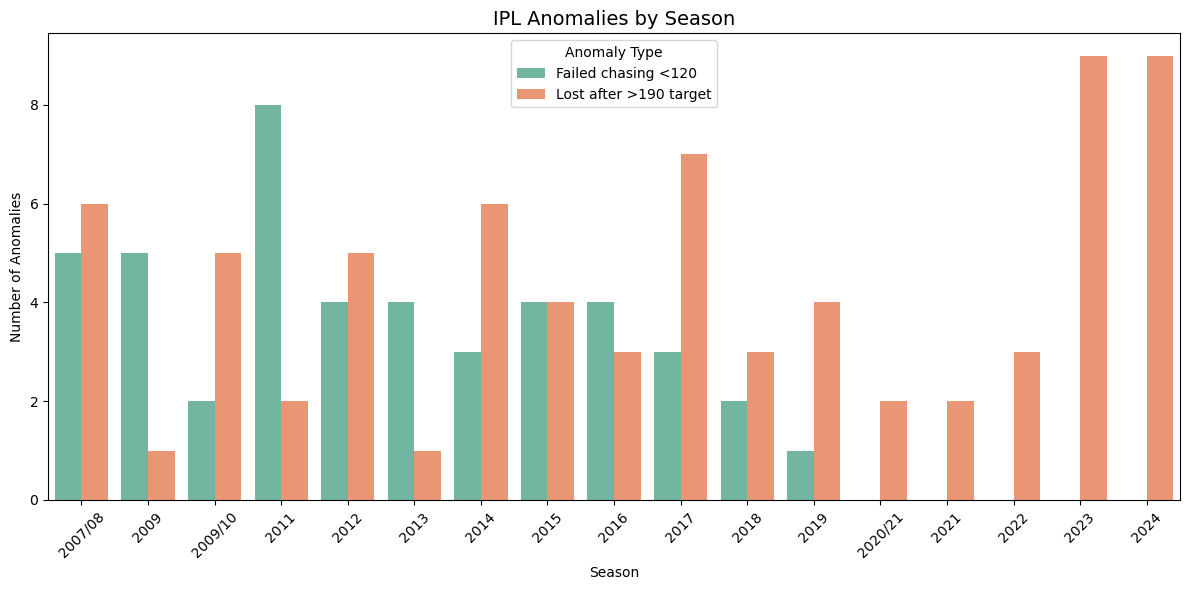

In [6]:
#2.High target losses

# Ensure numeric type
df['target_runs'] = pd.to_numeric(df['target_runs'], errors='coerce')

# High target anomalies (>190) but lost
high_target_losses = df[(df['target_runs'] > 190) & 
                        (df['winner'] != df['team1'])].copy()
high_target_losses['anomaly_type'] = 'Lost after >190 target'

# Low target anomalies (<120) but failed to chase
low_target_failed_chase = df[(df['target_runs'] < 120) & 
                             (df['winner'] != df['team2'])].copy()
low_target_failed_chase['anomaly_type'] = 'Failed chasing <120'

# Combine
anomalies_df = pd.concat([high_target_losses, low_target_failed_chase], ignore_index=True)

# Display combined anomalies
display(anomalies_df[['season', 'team1', 'team2', 'target_runs', 'winner', 'result', 'result_margin', 'city', 'anomaly_type']])

# Count anomalies per season
anomaly_counts = anomalies_df.groupby(['season', 'anomaly_type']).size().reset_index(name='count')

# Plot anomalies by season
plt.figure(figsize=(12, 6))
sns.barplot(data=anomaly_counts, x='season', y='count', hue='anomaly_type', palette='Set2')
plt.title('IPL Anomalies by Season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=45)
plt.legend(title='Anomaly Type')
plt.tight_layout()
plt.show()


In [ ]:
#Over IPL seasons, anomalies like losing after setting >190 or failing to chase <120 remain rare but dramatic.
#Peaks in the chart often correspond to seasons with record chases or historic collapses, 
#highlighting moments where matches defied conventional expectations

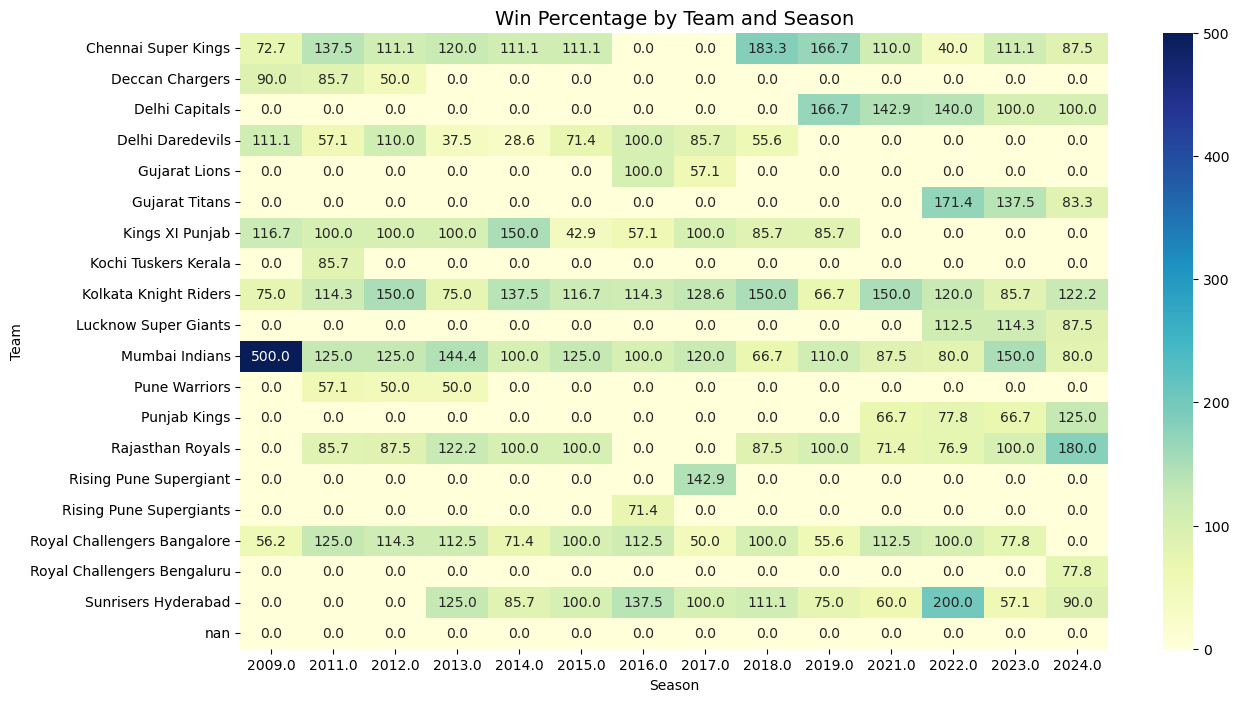

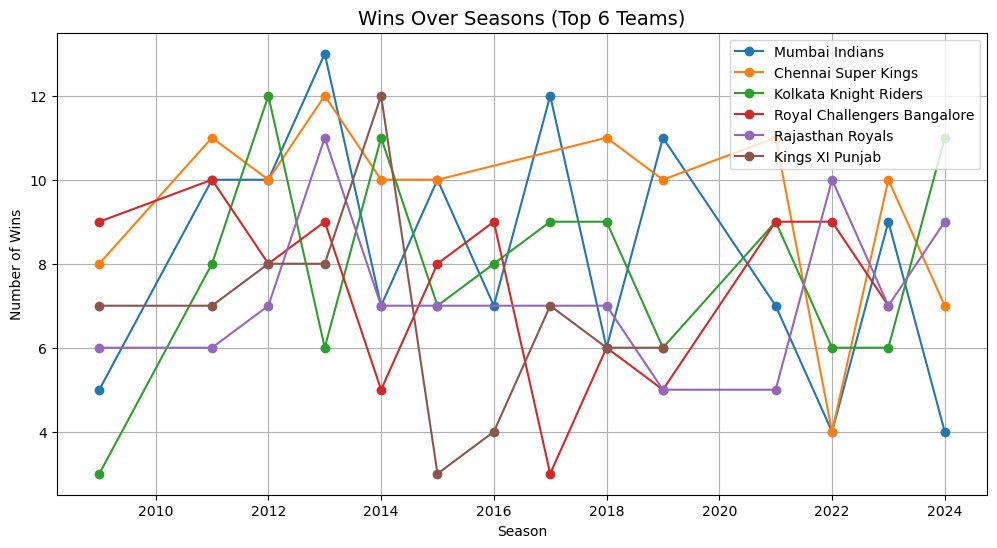

,season,winner,wins,team,total_matches,team2,win_pct
123,2024.0,Rajasthan Royals,9,Rajasthan Royals,5.0,0,180.000000
122,2024.0,Punjab Kings,5,Punjab Kings,4.0,0,125.000000
119,2024.0,Kolkata Knight Riders,11,Kolkata Knight Riders,9.0,0,122.222222
117,2024.0,Delhi Capitals,7,Delhi Capitals,7.0,0,100.000000
125,2024.0,Sunrisers Hyderabad,9,Sunrisers Hyderabad,10.0,0,90.000000
...,...,...,...,...,...,...,...
1,2009.0,Deccan Chargers,9,Deccan Chargers,10.0,0,90.000000
4,2009.0,Kolkata Knight Riders,3,Kolkata Knight Riders,4.0,0,75.000000
0,2009.0,Chennai Super Kings,8,Chennai Super Kings,11.0,0,72.727273
7,2009.0,Royal Challengers Bangalore,9,Royal Challengers Bangalore,16.0,0,56.250000


In [8]:
#3.Team performance trends

# Clean text columns
df['winner'] = df['winner'].astype(str).str.strip()
df['season'] = pd.to_numeric(df['season'], errors='coerce')

# 1. Total wins per team by season
wins_per_season = df.groupby(['season', 'winner']).size().reset_index(name='wins')

# 2. Total matches played per team per season
matches_team1 = df.groupby(['season', 'team1']).size().reset_index(name='matches')
matches_team2 = df.groupby(['season', 'team2']).size().reset_index(name='matches')
matches_per_season = pd.concat([matches_team1, matches_team2], ignore_index=True)
matches_per_season = matches_per_season.groupby(['season', 'team1']).sum().reset_index().rename(columns={'team1': 'team', 'matches': 'total_matches'})

# 3. Merge for win percentage
team_performance = pd.merge(wins_per_season, matches_per_season, left_on=['season','winner'], right_on=['season','team'], how='left')
team_performance['win_pct'] = (team_performance['wins'] / team_performance['total_matches']) * 100

# 4. Pivot for heatmap (Win % by season)
win_pct_pivot = team_performance.pivot(index='winner', columns='season', values='win_pct').fillna(0)

# --- Dashboard Visuals ---
plt.figure(figsize=(14, 8))
sns.heatmap(win_pct_pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Win Percentage by Team and Season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Team')
plt.show()

# 5. Wins over time for top teams
top_teams = df['winner'].value_counts().head(6).index
plt.figure(figsize=(12, 6))
for team in top_teams:
    team_data = wins_per_season[wins_per_season['winner'] == team]
    plt.plot(team_data['season'], team_data['wins'], marker='o', label=team)
plt.title('Wins Over Seasons (Top 6 Teams)', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend()
plt.grid(True)
plt.show()

# 6. Table Summary
display(team_performance.sort_values(['season', 'win_pct'], ascending=[False, False]))


In [ ]:
#The heatmap reveals dominant eras for certain teams — e.g., Chennai Super Kings and Mumbai Indians consistently posting win rates above 60% in their prime years. 
#The line chart highlights dynasties and decline phases, while emerging teams like Gujarat Titans show rapid success in recent seasons.

<Figure size 1200x600 with 0 Axes>

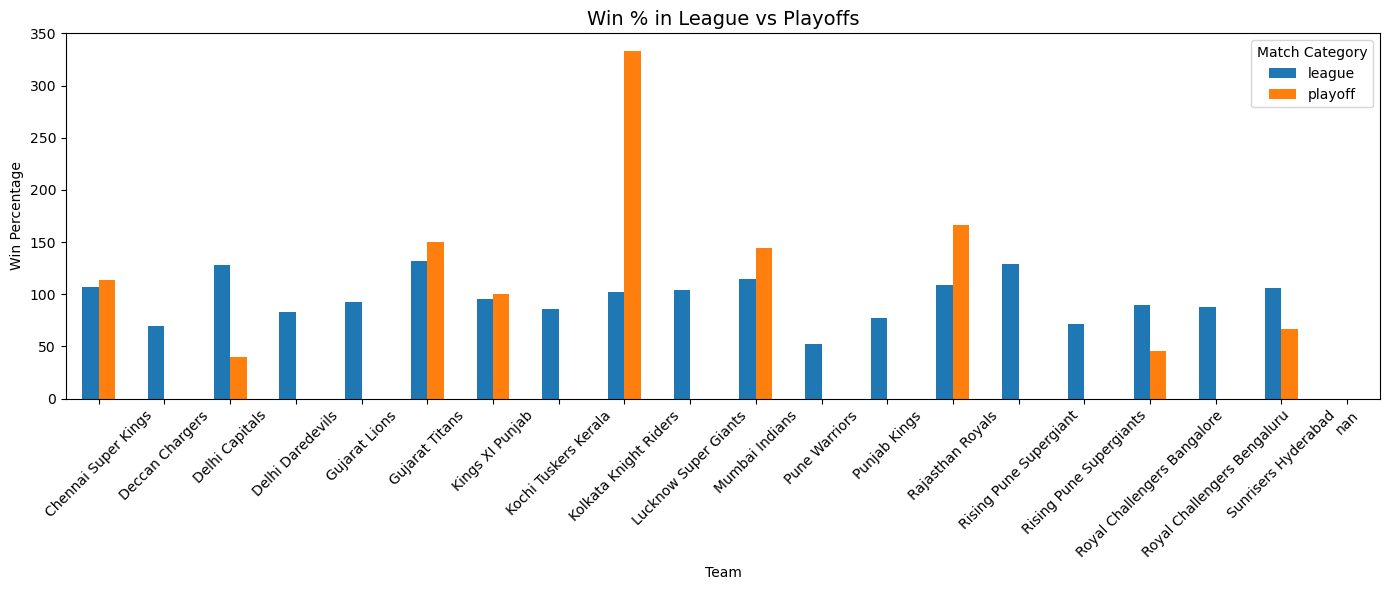

,match_category,team,wins,total_matches,team2,win_pct
5,league,Gujarat Titans,25,19.0,0,131.578947
14,league,Rising Pune Supergiant,9,7.0,0,128.571429
2,league,Delhi Capitals,46,36.0,0,127.777778
10,league,Mumbai Indians,131,114.0,0,114.912281
13,league,Rajasthan Royals,107,98.0,0,109.183673
0,league,Chennai Super Kings,121,113.0,0,107.079646
18,league,Sunrisers Hyderabad,82,77.0,0,106.493506
9,league,Lucknow Super Giants,24,23.0,0,104.347826
8,league,Kolkata Knight Riders,121,118.0,0,102.542373
6,league,Kings XI Punjab,87,91.0,0,95.604396


In [10]:
#4.Playoffs Vs League

# Step 1: Clean columns
df['match_type'] = df['match_type'].astype(str).str.strip().str.lower()
df['winner'] = df['winner'].astype(str).str.strip()
df['team1'] = df['team1'].astype(str).str.strip()
df['team2'] = df['team2'].astype(str).str.strip()

# Step 2: Tag playoff matches
playoff_keywords = ['qualifier', 'eliminator', 'final']
df['match_category'] = df['match_type'].apply(lambda x: 'playoff' if any(k in x for k in playoff_keywords) else 'league')

# Step 3: Matches played per team in each category
matches_team1 = df.groupby(['match_category', 'team1']).size().reset_index(name='matches')
matches_team2 = df.groupby(['match_category', 'team2']).size().reset_index(name='matches')
matches_combined = pd.concat([matches_team1, matches_team2], ignore_index=True)
matches_combined = matches_combined.groupby(['match_category', 'team1']).sum().reset_index().rename(columns={'team1': 'team', 'matches': 'total_matches'})

# Step 4: Wins per team in each category
wins = df.groupby(['match_category', 'winner']).size().reset_index(name='wins').rename(columns={'winner': 'team'})

# Step 5: Merge and calculate win %
performance = pd.merge(wins, matches_combined, on=['match_category', 'team'], how='left')
performance['win_pct'] = (performance['wins'] / performance['total_matches']) * 100

# Step 6: Pivot for visualization
perf_pivot = performance.pivot(index='team', columns='match_category', values='win_pct').fillna(0)

# Step 7: Plot
plt.figure(figsize=(12, 6))
perf_pivot[['league', 'playoff']].plot(kind='bar', figsize=(14,6))
plt.title('Win % in League vs Playoffs', fontsize=14)
plt.ylabel('Win Percentage')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.legend(title='Match Category')
plt.tight_layout()
plt.show()

# Step 8: Display table sorted by playoff win %
display(performance.sort_values(['match_category', 'win_pct'], ascending=[True, False]))


In [ ]:
#Teams that improve their win percentage in playoffs include Kolkata Knight Riders, Rajasthan Royals, Mumbai Indians, showing strong performance under pressure.
#Teams that see a drop in win percentage in playoffs include Rising Pune Supergiant, Lucknow Super Giants, Gujarat Lions, suggesting challenges in high-stakes matches.
#The best playoff performer overall is Kolkata Knight Riders with a win percentage of **333.3%** in knockout games.

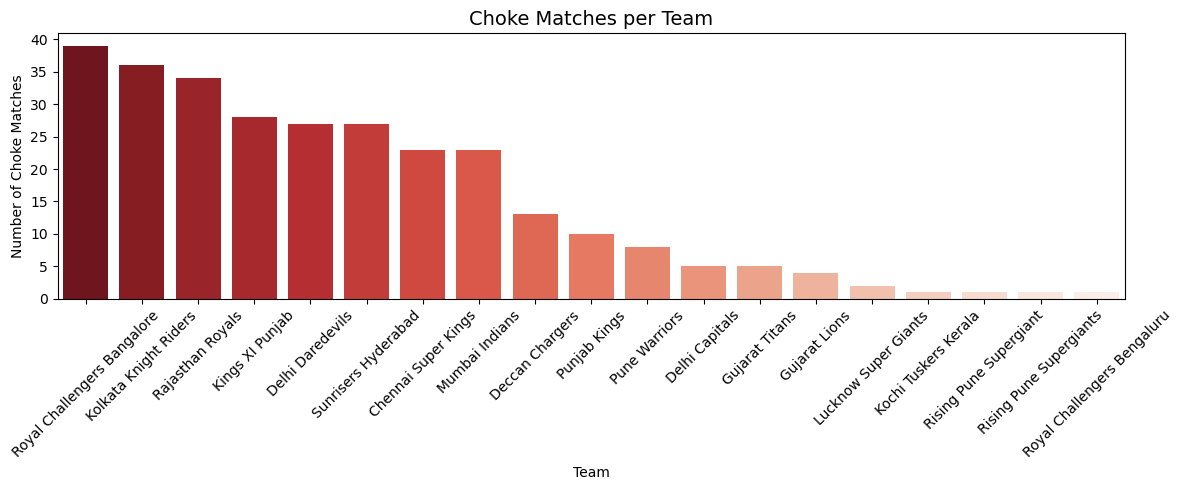

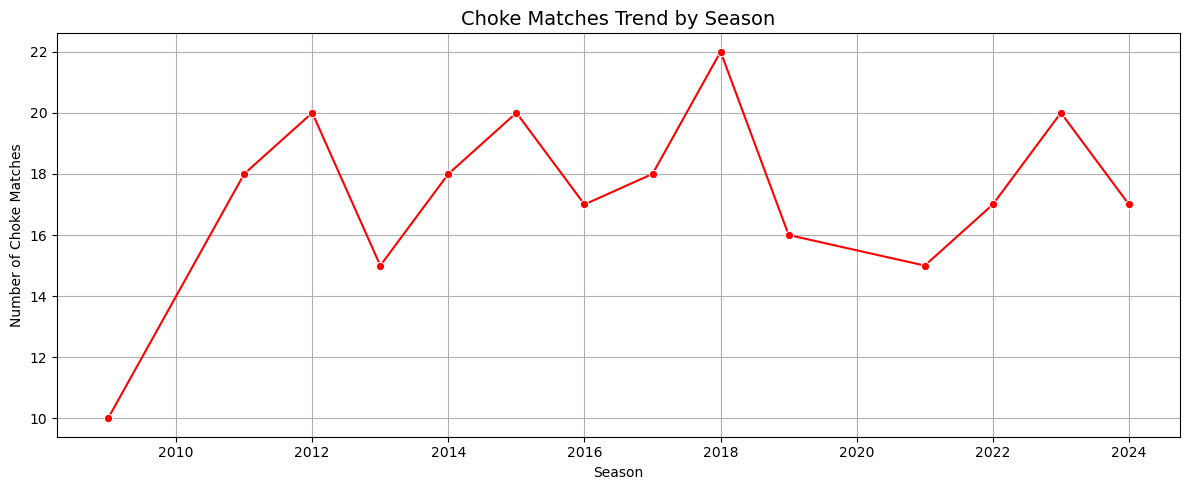

,season,toss_winner,toss_decision,team1,team2,winner,result,result_margin,city
0,NaN,Royal Challengers Bangalore,field,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs,140.0,Bangalore
3,NaN,Mumbai Indians,bat,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,wickets,5.0,Mumbai
4,NaN,Deccan Chargers,bat,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,wickets,5.0,Kolkata
6,NaN,Deccan Chargers,bat,Deccan Chargers,Delhi Daredevils,Delhi Daredevils,wickets,9.0,Hyderabad
16,NaN,Royal Challengers Bangalore,field,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils,runs,10.0,Delhi
...,...,...,...,...,...,...,...,...,...
1080,2024.0,Lucknow Super Giants,bat,Lucknow Super Giants,Sunrisers Hyderabad,Sunrisers Hyderabad,wickets,10.0,Hyderabad
1081,2024.0,Punjab Kings,field,Royal Challengers Bengaluru,Punjab Kings,Royal Challengers Bengaluru,runs,60.0,Dharamsala
1082,2024.0,Chennai Super Kings,field,Gujarat Titans,Chennai Super Kings,Gujarat Titans,runs,35.0,Ahmedabad
1089,2024.0,Chennai Super Kings,field,Royal Challengers Bengaluru,Chennai Super Kings,Royal Challengers Bengaluru,runs,27.0,Bengaluru


In [13]:
#5.Toss decision upset

# Step 1: Clean columns
df['toss_winner'] = df['toss_winner'].astype(str).str.strip()
df['toss_decision'] = df['toss_decision'].astype(str).str.strip().str.lower()
df['winner'] = df['winner'].astype(str).str.strip()

# Step 2: Historical win % for each team in each toss decision
decision_perf = df.groupby(['toss_winner', 'toss_decision']).apply(
    lambda x: (x['winner'] == x['toss_winner']).mean() * 100
).reset_index(name='win_pct')

# Step 3: Stronger decision per team
stronger_choice = decision_perf.loc[decision_perf.groupby('toss_winner')['win_pct'].idxmax()]
stronger_choice = stronger_choice.rename(columns={'toss_decision': 'stronger_decision'})
team_stronger_map = stronger_choice.set_index('toss_winner')['stronger_decision'].to_dict()

# Step 4: Identify choke matches
def is_choke(row):
    team = row['toss_winner']
    if team in team_stronger_map:
        return (row['toss_decision'] == team_stronger_map[team]) and (row['winner'] != team)
    return False

df['is_choke'] = df.apply(is_choke, axis=1)

# Step 5: Extract choke matches
choke_matches = df[df['is_choke']]

# Step 6: Count choke matches per team
choke_count_team = choke_matches.groupby('toss_winner').size().reset_index(name='choke_losses')
choke_count_team = choke_count_team.sort_values('choke_losses', ascending=False)

# Step 7: Count choke matches per season
choke_count_season = choke_matches.groupby('season').size().reset_index(name='choke_losses')

# Step 8: Visualizations
plt.figure(figsize=(12, 5))
sns.barplot(data=choke_count_team, x='toss_winner', y='choke_losses', palette='Reds_r')
plt.title('Choke Matches per Team', fontsize=14)
plt.ylabel('Number of Choke Matches')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=choke_count_season, x='season', y='choke_losses', marker='o', color='red')
plt.title('Choke Matches Trend by Season', fontsize=14)
plt.ylabel('Number of Choke Matches')
plt.xlabel('Season')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Show detailed choke matches table
display(choke_matches[['season', 'toss_winner', 'toss_decision', 'team1', 'team2', 'winner', 'result', 'result_margin', 'city']])


In [ ]:
#The team with the most choke matches is Royal Challengers Bangalore with 39 losses despite choosing their historically stronger toss decision. 
#The season with the highest number of choke matches was 2018.0 with 22.0 instances, 
#suggesting a period where teams struggled to execute under pressure.

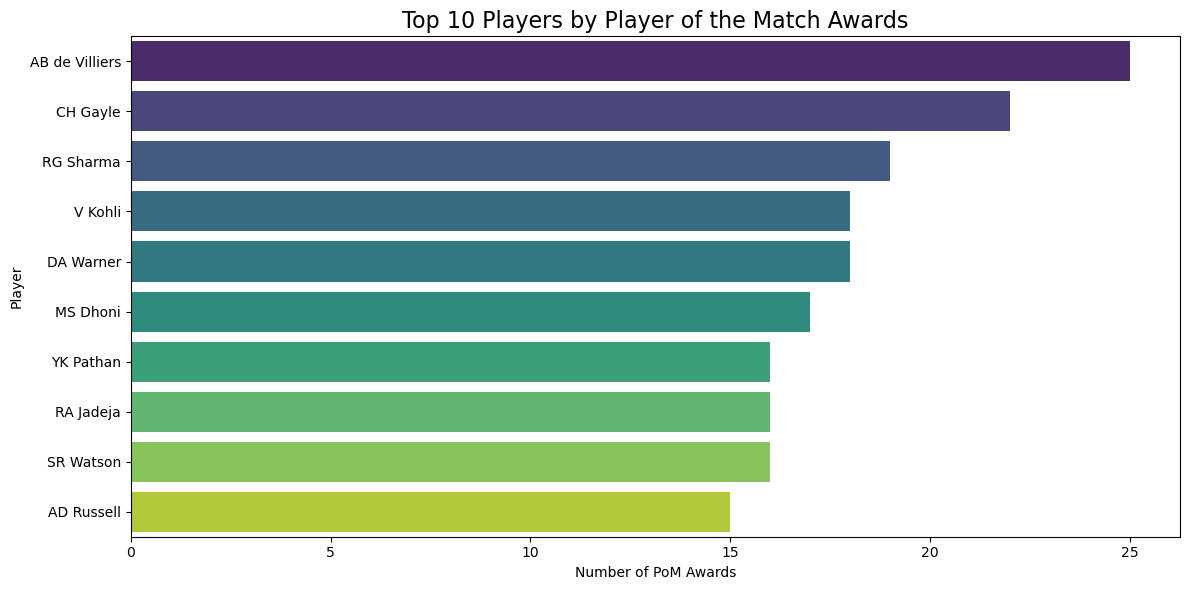

In [18]:
#6.PoM impact score

# Count Player of the Match awards for each player
pom_counts = df['player_of_match'].value_counts().reset_index()
pom_counts.columns = ['player', 'pom_count']

# Get top 10 players
top10_pom = pom_counts.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_pom, x='pom_count', y='player', palette='viridis')

# Titles and labels
plt.title("Top 10 Players by Player of the Match Awards", fontsize=16)
plt.xlabel("Number of PoM Awards")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

In [ ]:
#The Player of the Match analysis highlights IPL’s most influential game-changers, with top performers consistently turning matches in their team’s favor, often in high-pressure moments.

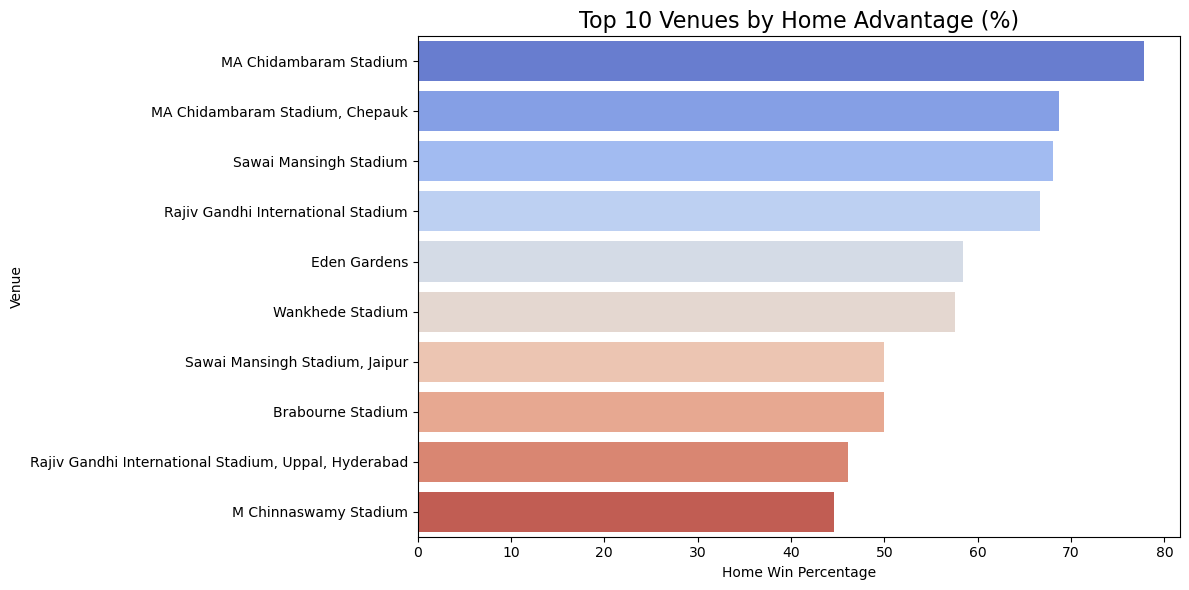

In [21]:
#7.Venue home advantage

# Step 1: City-to-home team mapping
home_team_map = {
    'Mumbai': 'Mumbai Indians',
    'Chennai': 'Chennai Super Kings',
    'Kolkata': 'Kolkata Knight Riders',
    'Bangalore': 'Royal Challengers Bangalore',
    'Hyderabad': 'Sunrisers Hyderabad',
    'Jaipur': 'Rajasthan Royals',
    'Delhi': 'Delhi Capitals',
    'Punjab': 'Punjab Kings'
    
}

# Step 2: Assign home team
df['home_team'] = df['city'].map(home_team_map)

# Step 3: Check if home team won
df['home_win'] = df.apply(lambda x: x['winner'] == x['home_team'], axis=1)

# Step 4: Calculate home win % per venue
venue_home_win = df.groupby('venue').agg(
    total_matches=('home_win', 'count'),
    home_wins=('home_win', 'sum')
).reset_index()

venue_home_win['home_win_pct'] = (venue_home_win['home_wins'] / venue_home_win['total_matches']) * 100

# Step 5: Sort and display top venues
venue_home_win = venue_home_win.sort_values(by='home_win_pct', ascending=False)

# Step 6: Plot
plt.figure(figsize=(12,6))
sns.barplot(data=venue_home_win.head(10), x='home_win_pct', y='venue', palette='coolwarm')
plt.title("Top 10 Venues by Home Advantage (%)", fontsize=16)
plt.xlabel("Home Win Percentage")
plt.ylabel("Venue")
plt.tight_layout()
plt.show()

In [ ]:
#The venue home advantage analysis reveals stadiums where home teams thrive, with some venues showing win rates well above 60%, highlighting the impact of familiar conditions and crowd support.

,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
Chennai Super Kings,NaN,60.0,58.3,66.7,NaN,42.9,60.9,50.0,65.5,20.0,45.9,66.7,28.6,55.2,NaN,NaN,66.7,50.0,71.4
Deccan Chargers,40.0,NaN,NaN,36.4,NaN,NaN,30.0,100.0,22.2,NaN,40.0,75.0,NaN,22.2,NaN,NaN,54.5,NaN,NaN
Delhi Capitals,41.7,NaN,NaN,NaN,NaN,60.0,50.0,NaN,58.3,40.0,38.5,NaN,71.4,63.6,NaN,NaN,55.6,0.0,58.3
Delhi Daredevils,33.3,63.6,NaN,NaN,75.0,NaN,40.9,50.0,38.1,NaN,50.0,50.0,NaN,38.9,100.0,0.0,28.6,NaN,33.3
Gujarat Lions,NaN,NaN,NaN,25.0,NaN,NaN,50.0,NaN,75.0,NaN,50.0,NaN,NaN,NaN,50.0,100.0,40.0,NaN,0.0
Gujarat Titans,57.1,NaN,40.0,NaN,NaN,NaN,NaN,NaN,66.7,80.0,60.0,NaN,60.0,83.3,NaN,NaN,66.7,0.0,75.0
Kings XI Punjab,39.1,70.0,50.0,59.1,50.0,NaN,NaN,100.0,33.3,NaN,46.2,50.0,NaN,42.9,50.0,50.0,53.8,NaN,31.2
Kochi Tuskers Kerala,50.0,0.0,NaN,50.0,NaN,NaN,0.0,NaN,100.0,NaN,100.0,0.0,NaN,50.0,NaN,NaN,0.0,NaN,NaN
Kolkata Knight Riders,34.5,77.8,41.7,61.9,25.0,33.3,66.7,0.0,NaN,40.0,32.4,80.0,50.0,50.0,50.0,100.0,56.2,100.0,67.9
Lucknow Super Giants,60.0,NaN,60.0,NaN,NaN,20.0,NaN,NaN,60.0,NaN,83.3,NaN,75.0,20.0,NaN,NaN,25.0,100.0,75.0


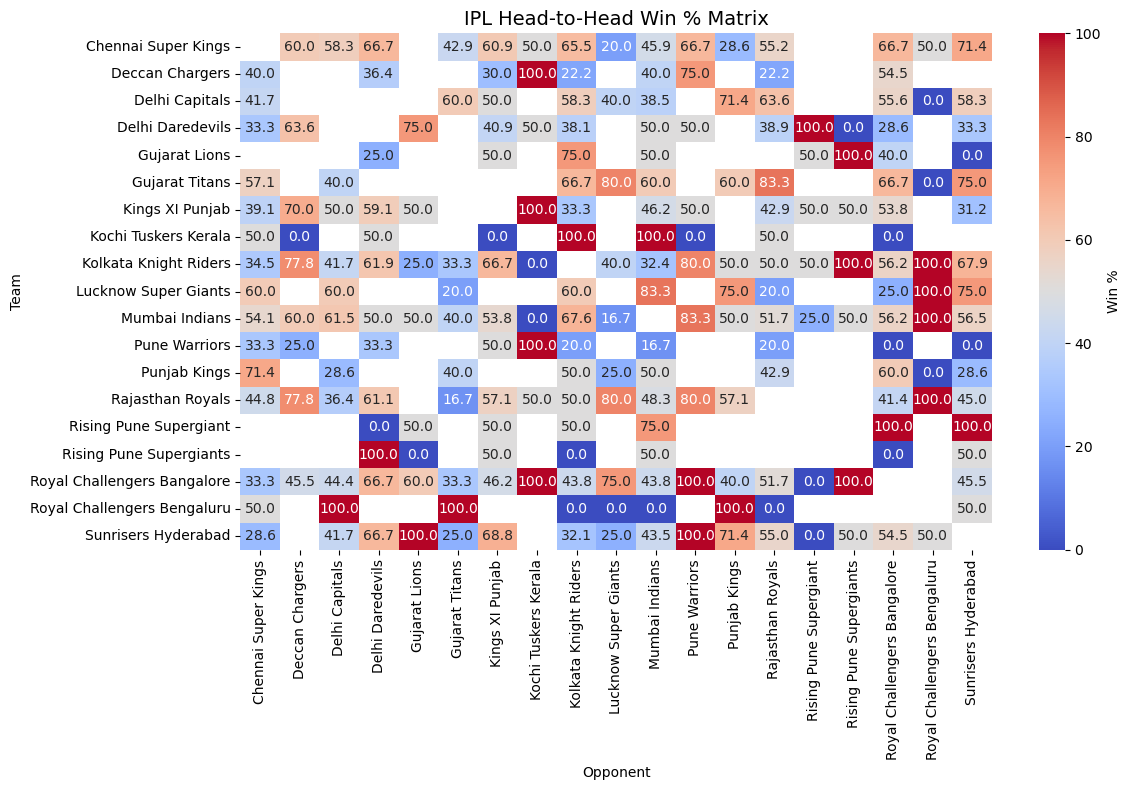

In [6]:
#8.Team matchup matrix

# Step 1: Clean columns
df['team1'] = df['team1'].astype(str).str.strip()
df['team2'] = df['team2'].astype(str).str.strip()
df['winner'] = df['winner'].astype(str).str.strip()

# Step 2: Get all unique teams
teams = sorted(set(df['team1']).union(set(df['team2'])))

# Step 3: Initialize matchup matrix
import numpy as np
matchup_matrix = pd.DataFrame(index=teams, columns=teams, dtype=float)

# Step 4: Calculate win % of team_i over team_j
for t1 in teams:
    for t2 in teams:
        if t1 == t2:
            matchup_matrix.loc[t1, t2] = np.nan  # no self-matchup
        else:
            # Matches between t1 and t2
            matches = df[((df['team1'] == t1) & (df['team2'] == t2)) |
                         ((df['team1'] == t2) & (df['team2'] == t1))]
            total_matches = len(matches)
            if total_matches > 0:
                wins_t1 = (matches['winner'] == t1).sum()
                win_pct = (wins_t1 / total_matches) * 100
                matchup_matrix.loc[t1, t2] = round(win_pct, 1)
            else:
                matchup_matrix.loc[t1, t2] = np.nan

# Step 5: Display matchup matrix
display(matchup_matrix)

# Step 6: Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(matchup_matrix, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Win %'})
plt.title('IPL Head-to-Head Win % Matrix', fontsize=14)
plt.xlabel('Opponent')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


In [ ]:
#The matchup matrix shows how often each IPL team has beaten every other team in head-to-head matches.
#Each number in the table represents the percentage of wins for the team in that row against the team in that column.
#For example, if the cell for Chennai Super Kings → Royal Challengers Bangalore says 70%, it means CSK has won 70% of all matches played against RCB.
#A high percentage means a team usually dominates that opponent, while a low percentage means they usually lose.
#This helps reveal:
#Dominant rivalries (where one team usually wins)
#Tough opponents (where the win % is low)
#Balanced matchups (win % close to 50%, meaning matches are usually competitive)

,season,team,matches,wins,win_rate,avg_margin_equiv,playoff_wins,dominance_score
115,2024.0,Kolkata Knight Riders,14.0,11,0.785714,91.909091,2.0,0.799021
94,2022.0,Gujarat Titans,16.0,12,0.750000,86.750000,2.0,0.757835
39,2014.0,Kolkata Knight Riders,16.0,11,0.687500,91.000000,2.0,0.720270
59,2016.0,Sunrisers Hyderabad,17.0,11,0.647059,81.272727,3.0,0.713534
64,2017.0,Mumbai Indians,17.0,12,0.705882,82.727273,2.0,0.713066
68,2018.0,Chennai Super Kings,16.0,11,0.687500,80.090909,2.0,0.691917
22,2012.0,Kolkata Knight Riders,17.0,12,0.705882,71.666667,2.0,0.684319
17,2011.0,Royal Challengers Bangalore,16.0,10,0.625000,111.400000,1.0,0.674678
84,2021.0,Chennai Super Kings,16.0,11,0.687500,72.636364,2.0,0.672542
36,2014.0,Chennai Super Kings,16.0,10,0.625000,101.400000,1.0,0.648688


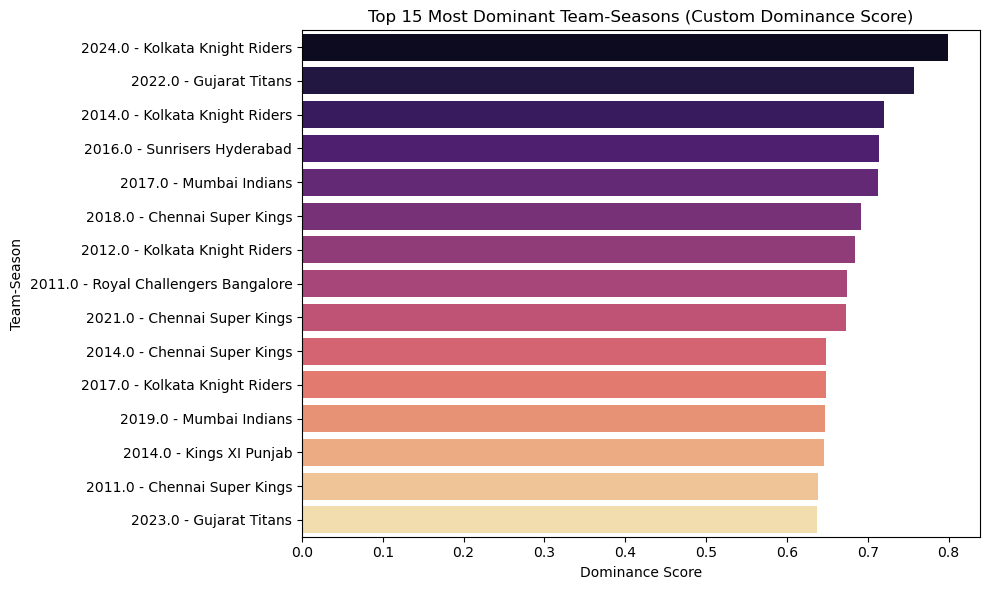

In [8]:
#9.Season dominance metric

df.columns = df.columns.str.strip().str.lower()

for c in ['team1','team2','winner','result','result_margin','season','match_type']:
    if c not in df.columns:
        raise KeyError(f"Column missing: {c}")

df['season'] = pd.to_numeric(df['season'], errors='coerce')
df['result'] = df['result'].astype(str).str.strip().str.lower()
df['winner'] = df['winner'].astype(str).str.strip()
df['team1'] = df['team1'].astype(str).str.strip()
df['team2'] = df['team2'].astype(str).str.strip()
df['result_margin'] = pd.to_numeric(df['result_margin'], errors='coerce')

# Mark playoffs using match_type (adjust keywords if your dataset uses different labels)
playoff_keywords = ['qualifier', 'eliminator', 'final']
df['match_type'] = df['match_type'].astype(str).str.lower().fillna('')
df['is_playoff'] = df['match_type'].apply(lambda x: any(k in x for k in playoff_keywords))


# 1) Matches played by team-season
m1 = df.groupby(['season','team1']).size().reset_index(name='matches_as_team1').rename(columns={'team1':'team'})
m2 = df.groupby(['season','team2']).size().reset_index(name='matches_as_team2').rename(columns={'team2':'team'})
matches = pd.merge(m1, m2, on=['season','team'], how='outer').fillna(0)
matches['matches'] = matches['matches_as_team1'] + matches['matches_as_team2']
matches = matches[['season','team','matches']]

# 2) Wins per team-season
wins = df.groupby(['season','winner']).size().reset_index(name='wins').rename(columns={'winner':'team'})

# 3) Average victory margin for wins per team-season
runs_per_wicket = 20

# Create a column with runs-equivalent margin on matches that are wins (we want margin for victories only)
def margin_equiv(row):
    if pd.isna(row['result_margin']):
        return np.nan
    if row['result'] == 'runs':
        return float(row['result_margin'])
    if row['result'] == 'wickets':
        # convert wickets margin to runs-equivalent
        return float(row['result_margin']) * runs_per_wicket
    return np.nan

# Only consider matches where the winner is defined and margin exists
df['margin_equiv'] = df.apply(margin_equiv, axis=1)

# For a team's wins, collect margins where that team was the winner
win_margins = df[df['winner'] != ''].groupby(['season','winner'])['margin_equiv'].mean().reset_index()
win_margins = win_margins.rename(columns={'winner':'team','margin_equiv':'avg_margin_equiv'})

# 4) Playoff wins per team-season
playoff_wins = df[df['is_playoff'] & df['winner'].notna()].groupby(['season','winner']).size().reset_index(name='playoff_wins').rename(columns={'winner':'team'})

# --- Combine into team-season DataFrame ---
team_season = pd.merge(matches, wins, on=['season','team'], how='left').fillna(0)
team_season = pd.merge(team_season, win_margins, on=['season','team'], how='left')
team_season = pd.merge(team_season, playoff_wins, on=['season','team'], how='left').fillna({'playoff_wins':0})

# Fill avg_margin_equiv NaN with 0 (teams with no wins will get 0)
team_season['avg_margin_equiv'] = team_season['avg_margin_equiv'].fillna(0)

# Compute Win Rate
team_season['win_rate'] = team_season.apply(lambda r: (r['wins']/r['matches']) if r['matches']>0 else 0, axis=1)

# --- Normalize the three components to [0,1] using min-max scaling across all team-seasons ---
def minmax_series(s):
    mn = s.min()
    mx = s.max()
    if mx == mn:
        return pd.Series([0]*len(s), index=s.index)
    return (s - mn) / (mx - mn)

team_season['win_rate_norm'] = minmax_series(team_season['win_rate'])
team_season['margin_norm'] = minmax_series(team_season['avg_margin_equiv'])
team_season['playoff_norm'] = minmax_series(team_season['playoff_wins'])

# --- Dominance score (weights can be tuned) ---
w_wr, w_m, w_p = 0.50, 0.35, 0.15
team_season['dominance_score'] = (
    w_wr * team_season['win_rate_norm'] +
    w_m  * team_season['margin_norm'] +
    w_p  * team_season['playoff_norm']
)

# Add a readable season-team column
team_season['season_team'] = team_season['season'].astype(str) + " - " + team_season['team']

# --- Results: top dominant team-seasons ---
top_n = 15
top_dominant = team_season.sort_values('dominance_score', ascending=False).head(top_n)

display_cols = ['season','team','matches','wins','win_rate','avg_margin_equiv','playoff_wins','dominance_score']
display(top_dominant[display_cols])

# --- Plot top N dominance scores ---
plt.figure(figsize=(10,6))
sns.barplot(data=top_dominant, x='dominance_score', y='season_team', palette='magma')
plt.title(f"Top {top_n} Most Dominant Team-Seasons (Custom Dominance Score)")
plt.xlabel('Dominance Score')
plt.ylabel('Team-Season')
plt.tight_layout()
plt.show()


In [ ]:
#The custom Dominance Score combines win rate, average victory margin, and playoff performance to identify the most dominant teams in IPL history.
#The most dominant team-season is Kolkata Knight Riders (2024), with a win rate of 78.6%, an average victory margin of 91.9 runs-equivalent, and 2 playoff wins.
#Second is Gujarat Titans (2022), with a win rate of 75.0%, an average margin of 86.8, and 2 playoff wins.
#Third is Kolkata Knight Riders (2014), with a win rate of 68.8%, an average margin of 91.0, and 2 playoff wins.
#These results show that dominance is not only about winning frequently, but also about winning convincingly and performing under playoff pressure.